# Data Imputation + Exploratory Data Analysis
### Jackson Au
### May 26, 2019

# 1) Business Understanding

For this Data Mining project, I used the Los Angeles Metro Bike Share Trip Data dataset available on Kaggle.com. Kaggle pulled this open source data from LA Metro, which is a governmental department in Los Angeles, California. LA Metro collects the data from their bicycle fleet daily but cleans and releases it as a CSV file quarterly. The Kaggle data set we are using was collected between July 2016 and April 2017.

I am interested in this data set because I live in cities which have had to grapple with the ubiquity of scooter and bike share companies. I have seen firsthand the benefits, as well as the drawbacks to these ride-share programs. However, as the world’s population and concern for human’s impact on the environment continues to increase, I predict that cities will continue to have to problem solve in regard to alternatives to traditional transportation methods. I am curious to gain relevant problem-solving experience with this type of real world data. I am also drawn to this data set because of the opportunity to work with longitudinal and latitudinal data, which will be a first for myself.

Sharing new insights about this data with LA Metro is the objective. As a governmental agency, it is likely that they are working on a shoestring budget. Therefore, my mission is to provide LA Metro with information about how to be economically efficient with their fleet of bikes in order for them to run this green transportation program sustainably in conjunction with their current departmental resources. One way we could measure the effectiveness of a predictive algorithm would be if my recommendations led to the increase in revenue or ridership for LA Metro bike share.

# 2) Data Meaning Type

- **Trip ID**: Unique integer number that is uniquely tied to the trip. 
- **Duration**: Time elapsed for bike share trip, measured in total seconds; integer; continuous
- **Start Time**: Beginning time of the passenger's bike trip; continuous; tracked with the following date format: YYYY-MM-DDTHH:MM:SS; 97,790 factor levels
- **End Time** Ending time of the passenger's bike trip; continuous; tracked with the following format: YYYY-MM-DDTHH:MM:SS; 90,743 factor levels
- **Starting Station ID**: Each bike share station has a unique integer number; this column provides the ID number of where the passenger began their bike share trip; integer; categorical
- **Starting Station Latitude**: A number signaling the starting angular distance (North/South) relative to Earth's equator; this is a continuous column with geographic coordinates
- **Starting Station Longitude**: A number signaling the starting angular distance (West/East) relative to the meridian of Greenwich, England; this is a continuous column with geographic coordinates
- **Ending Station ID**: Each bike share station has a unique integer number; this column provides the ID number of where the passenger concluded their bike share trip; this is a numerical column
- **Ending Station Latitude**: A number signaling the ending angular distance (North/South) relative to Earth's equator; continuous; this is a numerical column with geographic coordinates
- **Ending Station Longitude**: A number signaling the ending angular distance (West/East) relative to the meridian of Greenwich, England; this is a continuous column with geographic coordinates
- **Bike ID**: Each bike a part of the bike share program has a unique integer; this is a numerical column; integer
- **Plan Duration**: Amount of days in the passholder's plan, the number varies based on the "Passholder Type" column; numerical; integer; four factors (0, 30, 365, NA)
- **Trip Route Category**: The type of trip a person takes for their route; categorical; two factors (One Way, Round Trip)
- **Passholder Type**: There are different types of bike share programs that passengers can purchase for each month; categorical; four factors (Walk-Up, Monthly Pass, Staff Annual, Flex Pass)
- **Starting Lat-Long**: Combination of Starting Station Latitude and Starting Station Longitude data columns; this column contains text that properly identifies the longitude and latitude geographic coordinates; continuous; 126 levels
- **Ending Lat-Long**: Combination of Ending Station Latitude and Ending Station Longitude data columns; this column contains text that properly identifies the longitude and latitude geographic coordinates; continous; 128 levels
- **Neighborhood Councils (Certified)**: Los Angeles has city-certified local groups in certain neighborhoods; each neighborhood is uniquely identified by a number; integer and categorical; four factors (NA, 76, 28, 6)
- **Council Districts**: Districts have a representative council; if a value is present in this column, the rider was a part of a district council; integer; categorical; four factors (NA, 9, 11, 13)
- **Zip Codes**: 5-digit number for the location of the user's trip; integer; categorical; 9 factors (NA, 22728, 23078, 23074, 23076, 23075, 23082, 24038, 22724)
- **LA Specific Plans**: Integer; categorical; seven factors (NA, 54, 10, 27, 37, 34, 7)
- **Precinct Boundaries**: A unique number that identifies geographical precincts; integer; categorical; 22 factors (NA, 773, 1287, 466, 1050, 1502, 1047, 733, 1319, 1183, 527, 449, 1263NA, 1322, 1291, 1018, 68, 1262, 1227, 847, 1220, 660)
- **Census Tracts**: Another measurement that identifies neighborhoods; integer; categorical; 22 factors (NA, 547, 533, 546, 542, 564, 703, 543, 541, 536, 540, 909, 532, 545, 538, 693, 2139, 539, 544, 567, 694, 702)


In [1]:
import warnings
warnings.filterwarnings('ignore')

# 3) Data Quality

In [2]:
import pandas as pd
import numpy as np
import urllib
import json
import geopandas as gpd
import folium
import math 

# load data set
df = pd.read_csv('metro-bike-share-trip-data.csv')

In [3]:
# first glance at CSV file
df.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
0,18222186,15060,2017-01-19T17:05:00.000,2017-01-19T21:16:00.000,3031.0,34.044701,-118.252441,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9518671,77160,2016-10-09T14:37:00.000,2016-10-10T12:03:00.000,NaN,NaN,NaN,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20444932,86400,2017-02-18T10:15:00.000,2017-02-20T15:20:00.000,3026.0,34.063179,-118.245880,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20905031,18840,2017-02-27T12:26:00.000,2017-02-27T17:40:00.000,3023.0,34.050911,-118.240967,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21031476,86400,2017-02-27T20:26:00.000,2017-03-01T09:49:00.000,3008.0,34.046612,-118.262733,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Outlier Detection

In [4]:
# view basic statistical measures
df.describe()

,Trip ID,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
count,1.324270e+05,132427.000000,132408.000000,132379.000000,132379.000000,132331.000000,131376.000000,131376.000000,132417.000000,131661.000000,98590.000000,98590.000000,98590.000000,15837.000000,131328.000000,131328.000000
mean,1.153001e+07,1555.044666,3043.029062,34.039308,-118.221536,3042.389372,34.034615,-118.206640,6193.619090,44.841449,63.072462,9.187484,22975.160422,31.744712,1022.674357,552.299944
std,6.369497e+06,5811.295240,37.743240,0.529336,1.838335,43.084517,0.650706,2.259913,293.625217,90.451366,21.450090,0.685785,178.145308,12.918740,346.636853,60.369716
min,1.912818e+06,60.000000,3000.000000,0.000000,-118.472832,3000.000000,0.000000,-118.472832,1349.000000,0.000000,6.000000,9.000000,22724.000000,7.000000,68.000000,532.000000
25%,5.060814e+06,360.000000,3024.000000,34.044170,-118.256980,3022.000000,34.044159,-118.256981,5953.000000,0.000000,28.000000,9.000000,22728.000000,27.000000,733.000000,536.000000
50%,1.043827e+07,600.000000,3040.000000,34.046822,-118.250954,3038.000000,34.046810,-118.250954,6186.000000,30.000000,76.000000,9.000000,23075.000000,34.000000,1050.000000,543.000000
75%,1.720633e+07,1080.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238810,6434.000000,30.000000,76.000000,9.000000,23076.000000,37.000000,1291.000000,546.000000
max,2.379422e+07,86400.000000,4108.000000,34.064281,0.000000,4108.000000,34.064281,0.000000,6728.000000,365.000000,76.000000,13.000000,24038.000000,54.000000,1502.000000,2139.000000


### While we have many numerical factors in our data set, outlier detection may only be appropiate for the 'Duration' data column, as that tracks the amount of time a person spent on a bike. Other factors, even though they are integers such as Plan.Duration, Bike.ID or Zip.Code, are actually categorical in nature and summary statistics would not be a good representation.

In [5]:
## Let's dive deeper into our 'Duration' data column
df['Duration'].value_counts().sort_index()

60       1030
120      2249
180      4768
240      7330
300      8985
360      9549
420      9379
480      8878
540      7699
600      7022
660      6163
720      5465
780      4871
840      4344
900      3911
960      3419
1020     2908
1080     2569
1140     2273
1200     1991
1260     1715
1320     1604
1380     1423
1440     1327
1500     1187
1560     1122
1620     1047
1680      943
1740      845
1800      803
         ... 
80940       2
81060       2
81420       1
81540       1
81780       1
81960       1
82140       1
82320       1
82620       1
82740       1
82920       1
83400       1
83580       2
83820       2
83940       1
84240       2
84420       1
84540       2
84660       1
84840       1
84960       1
85200       1
85260       1
85560       1
85620       1
85680       1
85920       1
86040       1
86340       1
86400     270
Name: Duration, Length: 930, dtype: int64

### Duration is collected by the number of seconds per ride. According to the Bike Share website (https://bikeshare.metro.net/about/data/), it's possible for data errors: "Some short round trips or long trips may be the result of system or user error, but have been kept in the dataset for completeness." In fact, we notice some questionable data points (eg -- it seems to be a data error that someone has rode for 24 hours straight; especially 270 people!). We decided to explore these possible erroneous duration data points below. As the LA Metro website suggested, we found some data points which seemed unreasonable. We knew there were outliers in the duration variable because of the significant difference between the mean, 1555 seconds, and the median, 600 seconds. We determined to eliminate rides that lasted longer than 5760 seconds or 96 minutes. The majority of these individual factor levels only accounted for a minute amount of our data set at .03%. Those who clocked in at riding for 24 hours registered a slightly higher percentage, we all agreed that was likely a billing error and would result in a less accurate predictive model.

In [6]:
# We will take a look at bike rides that were hovering around the 24-hour mark and delete possibly incorrect data points.
dur_cts = df['Duration'].value_counts().sort_index()

# Let's cut out all rows where there were not AT LEAST 50 rides for the Duration variable.
# In other words, if there weren't at least 50 people for that specific duration of ride, we will eliminate those rows
# and consider them data processing errors.
# Though 86400 seconds has over 50 data points, we will delete these rows because it's hard to believe there were 
# folks who rode a bike for 24 hours straight.
dur_cts[dur_cts > 50]

# We see that any ride over 5760 seconds seems like a legitimate ride, given over 50 people completed those rides.

60       1030
120      2249
180      4768
240      7330
300      8985
360      9549
420      9379
480      8878
540      7699
600      7022
660      6163
720      5465
780      4871
840      4344
900      3911
960      3419
1020     2908
1080     2569
1140     2273
1200     1991
1260     1715
1320     1604
1380     1423
1440     1327
1500     1187
1560     1122
1620     1047
1680      943
1740      845
1800      803
         ... 
3780      122
3840      122
3900      119
3960      110
4020      105
4080      110
4140      107
4200       86
4260       93
4320       94
4380       84
4440       83
4500       92
4560       82
4620       95
4680       89
4740       89
4800       76
4860       78
4920       91
4980       62
5040       66
5100       66
5160       72
5220       62
5340       63
5400       60
5460       63
5760       53
86400     270
Name: Duration, Length: 92, dtype: int64

In [7]:
# Delete rows where rides exceeded 5760 seconds
df = df.loc[df['Duration'] <= 5760]

In [8]:
# Let's make sure we deleted them
dur_cts = df['Duration'].value_counts().sort_index()
dur_cts

60      1030
120     2249
180     4768
240     7330
300     8985
360     9549
420     9379
480     8878
540     7699
600     7022
660     6163
720     5465
780     4871
840     4344
900     3911
960     3419
1020    2908
1080    2569
1140    2273
1200    1991
1260    1715
1320    1604
1380    1423
1440    1327
1500    1187
1560    1122
1620    1047
1680     943
1740     845
1800     803
        ... 
4020     105
4080     110
4140     107
4200      86
4260      93
4320      94
4380      84
4440      83
4500      92
4560      82
4620      95
4680      89
4740      89
4800      76
4860      78
4920      91
4980      62
5040      66
5100      66
5160      72
5220      62
5280      48
5340      63
5400      60
5460      63
5520      47
5580      41
5640      44
5700      41
5760      53
Name: Duration, Length: 96, dtype: int64

In [9]:
# Let's dive into the geographical data (Latitude / Longitude columns) to see if there are possible outliers.

df['Starting Station Latitude'].value_counts().sort_index() # Nothing seems abnormal for Starting Latitude
df['Starting Station Longitude'].value_counts().sort_index()# Nothing seems abnormal for Starting Longitude
df['Ending Station Latitude'].value_counts().sort_index()   # Nothing seems abnormal for Ending Latitude
df['Ending Station Longitude'].value_counts().sort_index()  # Nothing seems abornmal for Ending Longitude

# Note: there were 32 rows with missing Starting Station Latitude, Starting Station Longitude
# and 48 rows with missing Ending Station Latitude, Ending Station Longitude. We will keep these
# rows since they are a small percentage of the data set.

-118.472832      42
-118.393867      39
-118.270813     213
-118.270810     166
-118.268082     440
-118.268080     246
-118.267982     939
-118.267980     502
-118.267090     580
-118.266403    1178
-118.266400     781
-118.266360     357
-118.266357     300
-118.265381     919
-118.265380     540
-118.264560     650
-118.264557     775
-118.263382    1593
-118.263380    1389
-118.263020      12
-118.262733    1263
-118.262730     934
-118.261170    1037
-118.261169    1259
-118.260950    1450
-118.260948    1954
-118.260860     969
-118.260857    1182
-118.260140     583
-118.260139     783
               ... 
-118.241560     931
-118.240970     991
-118.240967    1469
-118.238940     320
-118.238937     508
-118.238810    2239
-118.238808    2948
-118.238330     465
-118.238327     525
-118.238243     102
-118.237411    3644
-118.237410     946
-118.237213    2934
-118.237210    2362
-118.237030    1473
-118.236490     358
-118.236488     469
-118.236160    1144
-118.235352    1863


### After that, we addressed missing values in our data set.

In [10]:
#Discovering where there are missing values (columns)
df.isna().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                      18
Starting Station Latitude                44
Starting Station Longitude               44
Ending Station ID                        56
Ending Station Latitude                 332
Ending Station Longitude                332
Bike ID                                   9
Plan Duration                           683
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     32598
Ending Lat-Long                         332
Neighborhood Councils (Certified)     32627
Council Districts                     32627
Zip Codes                             32627
LA Specific Plans                    113056
Precinct Boundaries                     374
Census Tracts                           374
dtype: int64

### We made the following observations about missing values in our data set:

- If we know Starting Station ID, we can insert Starting Station Latitude/Starting Station Longitude and vice-versa
- If we know Ending Station ID, we can insert Ending Station Latitude/Ending Station Longitude and vice-versa
- If we know Starting Station Latitude/Starting Station Latitude, we can write a function to create *Starting Lat-Long*
- Same for *Ending Lat-Long*

In [11]:
# clean missing values in 'Starting Station ID column'
missing_strtst_id = df[df['Starting Station ID'].isna()] ## rows where Starting Station ID is missing values


### Logically, it made sense to derive **Starting Station ID** by looking at the Lat and Long columns. However, it seems any **Starting Station ID** column is not accompanied by Lat and Long data. We may need to delete these rows, given that our dataset is already this big (132,000 rows). We'll revisit this if there's no decipherable way to figure out **Starting Station ID**.

In [12]:
## Cleaning missing values in 'Starting_Station_Latitude' column

missing_strtst_lat = df[df['Starting Station Latitude'].isna()]

missing_strtst_lat

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
5,9378284,60,2016-10-09T09:40:00.000,2016-10-09T09:41:00.000,NaN,NaN,NaN,NaN,NaN,NaN,...,One Way,Staff Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12531532,1500,2016-11-06T14:34:00.000,2016-11-06T14:59:00.000,NaN,NaN,NaN,3034.0,34.042061,-118.263382,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.263382', 'latitude': '34.0...",NaN,NaN,NaN,NaN,773.0,547.0
116,21934003,780,2017-03-12T14:44:00.000,2017-03-12T14:57:00.000,3000.0,NaN,NaN,3064.0,34.046810,-118.256981,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.256981', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1050.0,546.0
164,23607494,60,2017-03-31T08:06:00.000,2017-03-31T08:07:00.000,3000.0,NaN,NaN,3000.0,NaN,NaN,...,Round Trip,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,21926437,1380,2017-03-12T12:29:00.000,2017-03-12T12:52:00.000,3000.0,NaN,NaN,3082.0,34.046520,-118.237411,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.237411', 'latitude': '34.0...",NaN,NaN,NaN,NaN,466.0,533.0
415,21750457,720,2017-03-10T12:41:00.000,2017-03-10T12:53:00.000,3000.0,NaN,NaN,3014.0,34.056610,-118.237213,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.237213', 'latitude': '34.0...",NaN,NaN,NaN,27.0,1322.0,532.0
521,23607487,60,2017-03-31T08:09:00.000,2017-03-31T08:10:00.000,3000.0,NaN,NaN,3000.0,NaN,NaN,...,Round Trip,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,15708679,840,2016-12-11T14:43:00.000,2016-12-11T14:57:00.000,NaN,NaN,NaN,3055.0,34.044159,-118.251579,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.251579', 'latitude': '34.0...",NaN,NaN,NaN,NaN,527.0,542.0
762,22591302,2700,2017-03-19T14:18:00.000,2017-03-19T15:03:00.000,3000.0,NaN,NaN,3069.0,34.050880,-118.248253,...,One Way,Flex Pass,NaN,"{'longitude': '-118.248253', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1183.0,541.0
844,20310927,1560,2017-02-18T15:54:00.000,2017-02-18T16:20:00.000,3000.0,NaN,NaN,3069.0,34.050880,-118.248253,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.248253', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1183.0,541.0


### We can leverage Starting Station ID to replace missing 'Starting Station Latitude'. It seems we only have Station ID 3000 while the rest are NaN. Next, we will look into what 3000 corresponds to for Latitude and Longitude.

In [13]:
df.loc[df['Starting Station ID'] == 3000.0]

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
116,21934003,780,2017-03-12T14:44:00.000,2017-03-12T14:57:00.000,3000.0,NaN,NaN,3064.0,34.046810,-118.256981,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.256981', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1050.0,546.0
164,23607494,60,2017-03-31T08:06:00.000,2017-03-31T08:07:00.000,3000.0,NaN,NaN,3000.0,NaN,NaN,...,Round Trip,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,21926437,1380,2017-03-12T12:29:00.000,2017-03-12T12:52:00.000,3000.0,NaN,NaN,3082.0,34.046520,-118.237411,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.237411', 'latitude': '34.0...",NaN,NaN,NaN,NaN,466.0,533.0
415,21750457,720,2017-03-10T12:41:00.000,2017-03-10T12:53:00.000,3000.0,NaN,NaN,3014.0,34.056610,-118.237213,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.237213', 'latitude': '34.0...",NaN,NaN,NaN,27.0,1322.0,532.0
521,23607487,60,2017-03-31T08:09:00.000,2017-03-31T08:10:00.000,3000.0,NaN,NaN,3000.0,NaN,NaN,...,Round Trip,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,22591302,2700,2017-03-19T14:18:00.000,2017-03-19T15:03:00.000,3000.0,NaN,NaN,3069.0,34.050880,-118.248253,...,One Way,Flex Pass,NaN,"{'longitude': '-118.248253', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1183.0,541.0
844,20310927,1560,2017-02-18T15:54:00.000,2017-02-18T16:20:00.000,3000.0,NaN,NaN,3069.0,34.050880,-118.248253,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.248253', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1183.0,541.0
1434,21101030,2160,2017-03-02T07:16:00.000,2017-03-02T07:52:00.000,3000.0,NaN,NaN,3035.0,34.048401,-118.260948,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.260948', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1050.0,546.0
1486,22692514,2160,2017-03-20T17:07:00.000,2017-03-20T17:43:00.000,3000.0,NaN,NaN,3052.0,34.051102,-118.264557,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.264557', 'latitude': '34.0...",NaN,NaN,NaN,54.0,847.0,567.0
1510,21688313,1320,2017-03-09T17:55:00.000,2017-03-09T18:17:00.000,3000.0,NaN,NaN,3052.0,34.051102,-118.264557,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.264557', 'latitude': '34.0...",NaN,NaN,NaN,54.0,847.0,567.0


### It seems Starting Station ID 3000 does not correspond any Starting Station Latitude nor any Starting Station Longitude. 
- Looks like we can drop all rows where Starting Station ID is missing because there is no way to decipher its latitude and longitude
- Looks like we can also drop all rows where Starting Station Latitude and Starting Station Longitude = NaN because we cannot gather any insight from the Starting Station ID column

In [14]:
df = df.dropna(subset = ['Starting Station ID', 'Starting Station Latitude', 'Starting Station Longitude'])

df ## Cleaned #Starting Station ID, Starting Station Latitude, 
   ## and Starting Station Longitude variables


,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
9,18481915,600,2017-01-23T18:48:00.000,2017-01-23T18:58:00.000,3082.0,34.046520,-118.237411,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,19403230,480,2017-02-05T09:43:00.000,2017-02-05T09:51:00.000,3064.0,34.046810,-118.256981,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,18732968,480,2017-01-27T19:55:00.000,2017-01-27T20:03:00.000,3063.0,34.049198,-118.252831,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,20298819,780,2017-02-18T12:39:00.000,2017-02-18T12:52:00.000,3014.0,34.056610,-118.237213,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,21369192,1380,2017-03-05T18:35:00.000,2017-03-05T18:58:00.000,3078.0,34.064281,-118.238937,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,22579585,1860,2017-03-19T12:24:00.000,2017-03-19T12:55:00.000,3014.0,34.056610,-118.237213,3000.0,NaN,NaN,...,One Way,Walk-up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,18324185,900,2017-01-21T11:25:00.000,2017-01-21T11:40:00.000,3037.0,34.034801,-118.231277,3000.0,NaN,NaN,...,One Way,Flex Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,21653845,1080,2017-03-09T07:36:00.000,2017-03-09T07:54:00.000,3052.0,34.051102,-118.264557,3000.0,NaN,NaN,...,One Way,Monthly Pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,17848847,480,2017-01-13T21:32:00.000,2017-01-13T21:40:00.000,3082.0,34.046520,-118.237411,3036.0,34.039188,-118.232529,...,One Way,Walk-up,NaN,"{'longitude': '-118.232529', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1287.0,533.0
26,20700706,540,2017-02-24T23:13:00.000,2017-02-24T23:22:00.000,3029.0,34.048851,-118.246422,3082.0,34.046520,-118.237411,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.237411', 'latitude': '34.0...",NaN,NaN,NaN,NaN,466.0,533.0


In [15]:
#check for na values
df.isna().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                       0
Starting Station Latitude                 0
Starting Station Longitude                0
Ending Station ID                        54
Ending Station Latitude                 327
Ending Station Longitude                327
Bike ID                                   9
Plan Duration                           666
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     32554
Ending Lat-Long                         327
Neighborhood Councils (Certified)     32583
Council Districts                     32583
Zip Codes                             32583
LA Specific Plans                    113019
Precinct Boundaries                     369
Census Tracts                           369
dtype: int64

### We will now evaluate the how to handle missing values for the Ending Stations.

In [16]:
missing_endst_id = df[df['Ending Station ID'].isna()] ## rows where Starting Station ID is missing values
missing_endst_id

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
92,14991982,180,2016-12-03T11:12:00.000,2016-12-03T11:15:00.000,3048.0,34.041691,-118.235352,NaN,NaN,NaN,...,One Way,Monthly Pass,"{'longitude': '-118.235352', 'latitude': '34.0...",NaN,28.0,9.0,23074.0,NaN,NaN,NaN
299,13688288,1440,2016-11-17T14:06:00.000,2016-11-17T14:30:00.000,3030.0,34.051941,-118.243530,NaN,NaN,NaN,...,One Way,Staff Annual,"{'longitude': '-118.24353', 'latitude': '34.05...",NaN,76.0,9.0,22728.0,NaN,NaN,NaN
367,11312442,1200,2016-10-25T16:40:00.000,2016-10-25T17:00:00.000,3038.0,34.046822,-118.248352,NaN,NaN,NaN,...,One Way,Staff Annual,"{'longitude': '-118.248352', 'latitude': '34.0...",NaN,76.0,9.0,23074.0,NaN,NaN,NaN
604,16320553,1860,2016-12-19T13:17:00.000,2016-12-19T13:48:00.000,3005.0,34.048550,-118.259048,NaN,NaN,NaN,...,One Way,Staff Annual,"{'longitude': '-118.259048', 'latitude': '34.0...",NaN,76.0,9.0,23078.0,NaN,NaN,NaN
885,12834118,2340,2016-11-09T07:27:00.000,2016-11-09T08:06:00.000,3052.0,34.051102,-118.264557,NaN,NaN,NaN,...,One Way,Staff Annual,"{'longitude': '-118.264557', 'latitude': '34.0...",NaN,76.0,11.0,23078.0,NaN,NaN,NaN
1097,15708703,2220,2016-12-11T13:45:00.000,2016-12-11T14:22:00.000,3052.0,34.051102,-118.264557,NaN,NaN,NaN,...,One Way,Walk-up,"{'longitude': '-118.264557', 'latitude': '34.0...",NaN,76.0,11.0,23078.0,NaN,NaN,NaN
1360,9393909,2820,2016-10-09T11:53:00.000,2016-10-09T12:40:00.000,3064.0,34.046810,-118.256981,NaN,NaN,NaN,...,One Way,Monthly Pass,"{'longitude': '-118.256981', 'latitude': '34.0...",NaN,76.0,9.0,23075.0,NaN,NaN,NaN
1476,8877694,3180,2016-10-05T08:38:00.000,2016-10-05T09:31:00.000,3062.0,34.047749,-118.243172,NaN,NaN,NaN,...,One Way,Staff Annual,"{'longitude': '-118.243172', 'latitude': '34.0...",NaN,28.0,9.0,22728.0,NaN,NaN,NaN
1644,12531541,1980,2016-11-06T14:26:00.000,2016-11-06T14:59:00.000,3064.0,34.046810,-118.256981,NaN,NaN,NaN,...,One Way,Walk-up,"{'longitude': '-118.256981', 'latitude': '34.0...",NaN,76.0,9.0,23075.0,NaN,NaN,NaN
1697,16514623,2820,2016-12-22T09:58:00.000,2016-12-22T10:45:00.000,3046.0,34.053020,-118.247948,NaN,NaN,NaN,...,One Way,Staff Annual,"{'longitude': '-118.247948', 'latitude': '34.0...",NaN,76.0,9.0,22728.0,NaN,NaN,NaN


### There seems to be no logical way to decipher Ending Station ID given that there are no accompanying Latitude and Longitude points. We will drop these rows and proceed.

In [17]:
#drop rows with NA values in Ending Station ID
df = df.dropna(subset = ['Ending Station ID'])

### Next we will look at missing values in 'Ending Station Latitude'. It appears only Ending Station ID is the only unique value being returned. From our earlier findings in our EDA, 3000 was an indecipherable station ID. We'll need to drop these rows as well.

In [18]:
missing_endst_lat = df[df['Ending Station Latitude'].isna()]

In [19]:
# let's see which distinct Station IDs are returned
missing_endst_lat['Ending Station ID'].unique()

array([3000.])

In [20]:
# drop NA fo Ending station latitude
df = df.dropna(subset = ['Ending Station Latitude', 'Ending Station Longitude'])

df

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,...,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
25,17848847,480,2017-01-13T21:32:00.000,2017-01-13T21:40:00.000,3082.0,34.046520,-118.237411,3036.0,34.039188,-118.232529,...,One Way,Walk-up,NaN,"{'longitude': '-118.232529', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1287.0,533.0
26,20700706,540,2017-02-24T23:13:00.000,2017-02-24T23:22:00.000,3029.0,34.048851,-118.246422,3082.0,34.046520,-118.237411,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.237411', 'latitude': '34.0...",NaN,NaN,NaN,NaN,466.0,533.0
27,20595730,840,2017-02-23T07:34:00.000,2017-02-23T07:48:00.000,3022.0,34.046070,-118.233093,3005.0,34.048550,-118.259048,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.259048', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1050.0,546.0
28,17307719,420,2017-01-05T12:04:00.000,2017-01-05T12:11:00.000,3059.0,34.037949,-118.256271,3038.0,34.046822,-118.248352,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.248352', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1502.0,542.0
31,18941656,840,2017-01-30T20:19:00.000,2017-01-30T20:33:00.000,3035.0,34.048401,-118.260948,3040.0,34.053570,-118.266357,...,One Way,Walk-up,NaN,"{'longitude': '-118.266357', 'latitude': '34.0...",NaN,NaN,NaN,54.0,1047.0,564.0
33,18023215,300,2017-01-16T18:14:00.000,2017-01-16T18:19:00.000,3067.0,34.045181,-118.250237,3064.0,34.046810,-118.256981,...,One Way,Walk-up,NaN,"{'longitude': '-118.256981', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1050.0,546.0
36,21926434,540,2017-03-12T12:37:00.000,2017-03-12T12:46:00.000,3076.0,34.040600,-118.253838,3063.0,34.049198,-118.252831,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.252831', 'latitude': '34.0...",NaN,NaN,NaN,NaN,733.0,546.0
37,21684654,1260,2017-03-09T17:27:00.000,2017-03-09T17:48:00.000,3025.0,34.032860,-118.268082,3077.0,34.039871,-118.250038,...,One Way,Walk-up,NaN,"{'longitude': '-118.250038', 'latitude': '34.0...",NaN,NaN,NaN,NaN,1319.0,703.0
39,23355994,720,2017-03-28T13:47:00.000,2017-03-28T13:59:00.000,3030.0,34.051941,-118.243530,3019.0,34.038609,-118.260857,...,One Way,Walk-up,NaN,"{'longitude': '-118.260857', 'latitude': '34.0...",NaN,NaN,NaN,NaN,773.0,547.0
41,21435123,420,2017-03-06T14:31:00.000,2017-03-06T14:38:00.000,3048.0,34.041691,-118.235352,3058.0,34.035801,-118.233170,...,One Way,Monthly Pass,NaN,"{'longitude': '-118.23317', 'latitude': '34.03...",NaN,NaN,NaN,NaN,1287.0,533.0


In [21]:
df.isna().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                       0
Starting Station Latitude                 0
Starting Station Longitude                0
Ending Station ID                         0
Ending Station Latitude                   0
Ending Station Longitude                  0
Bike ID                                   9
Plan Duration                           599
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     32397
Ending Lat-Long                           0
Neighborhood Councils (Certified)     32426
Council Districts                     32426
Zip Codes                             32426
LA Specific Plans                    112692
Precinct Boundaries                      42
Census Tracts                            42
dtype: int64

### After checking for missing Bike IDs, we find only nine. We will delete these rows since there is no way to decipher an unknown Bike ID.

In [22]:
# drop unknowns for bike IDs
df = df.dropna(subset = ['Bike ID'])

In [23]:
# recheck for na values
df.isna().sum()

Trip ID                                   0
Duration                                  0
Start Time                                0
End Time                                  0
Starting Station ID                       0
Starting Station Latitude                 0
Starting Station Longitude                0
Ending Station ID                         0
Ending Station Latitude                   0
Ending Station Longitude                  0
Bike ID                                   0
Plan Duration                           594
Trip Route Category                       0
Passholder Type                           0
Starting Lat-Long                     32391
Ending Lat-Long                           0
Neighborhood Councils (Certified)     32420
Council Districts                     32420
Zip Codes                             32420
LA Specific Plans                    112687
Precinct Boundaries                      42
Census Tracts                            42
dtype: int64

# 4) Visualize Appropriate Statistics

In [24]:
df.describe()

,Trip ID,Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Neighborhood Councils (Certified),Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts
count,1.279900e+05,127990.000000,127990.000000,127990.000000,127990.000000,127990.000000,127990.000000,127990.000000,127990.000000,127396.000000,95570.000000,95570.000000,95570.000000,15303.000000,127948.000000,127948.000000
mean,1.149424e+07,866.683803,3043.002492,34.039843,-118.223214,3042.615720,34.035891,-118.210891,6194.071693,45.474112,63.099613,9.183823,22974.846877,31.655296,1023.723747,551.285819
std,6.363384e+06,832.319495,37.211256,0.512486,1.779805,42.257038,0.616693,2.141770,293.306184,90.720642,21.435733,0.679657,178.395003,12.779656,346.239698,46.304646
min,1.912818e+06,60.000000,3005.000000,0.000000,-118.472832,3005.000000,0.000000,-118.472832,4727.000000,0.000000,6.000000,9.000000,22724.000000,7.000000,68.000000,532.000000
25%,5.060414e+06,360.000000,3024.000000,34.044170,-118.256980,3023.000000,34.044159,-118.256981,5955.000000,0.000000,28.000000,9.000000,22728.000000,27.000000,733.000000,536.000000
50%,1.036840e+07,600.000000,3040.000000,34.046822,-118.250954,3038.000000,34.046810,-118.250954,6188.000000,30.000000,76.000000,9.000000,23075.000000,34.000000,1050.000000,543.000000
75%,1.715131e+07,1020.000000,3063.000000,34.050880,-118.241562,3063.000000,34.050480,-118.238810,6434.000000,30.000000,76.000000,9.000000,23076.000000,37.000000,1291.000000,546.000000
max,2.366484e+07,5760.000000,4108.000000,34.064281,0.000000,4108.000000,34.064281,0.000000,6728.000000,365.000000,76.000000,13.000000,24038.000000,54.000000,1502.000000,2139.000000


### The table above shows simple statistics for the numerical fields within our LA metro bike data. We have 131,327 observations in our data after cleaning up missing or unnecessary values. Average trip duration is 1,356 seconds, or just under 23 minutes. Trip duration is capped at 24-hours, and the minimum recorded duration is one minute. 

### In terms of plan duration, the average amount of days in a passholder's plan is 45 days, maxing out at the year mark (365 days). Many of our variables are non-continuous; the following statistics seek to gain some insight into these variables.

In [25]:
#simple count table and percentage to see the amount of trips being taken in each council district
cd = df.groupby('Council Districts')['Trip ID'].count().reset_index()
cd['Percentage'] = 100 * cd['Trip ID']  / cd['Trip ID'].sum()
print (cd)

   Council Districts  Trip ID  Percentage
0                9.0    88316   92.409752
1               11.0     5724    5.989327
2               13.0     1530    1.600921


### Based on the code above, it appears there are three Council districts, and 92% of the trips were taken in Council Distrinct number 9

In [26]:
#simple count table and percentage to see the amount of trips being taken in each neighborhood council
nc = df.groupby('Neighborhood Councils (Certified)')['Trip ID'].count().reset_index()
nc['Percentage'] = 100 * nc['Trip ID']  / nc['Trip ID'].sum()
print (nc)

   Neighborhood Councils (Certified)  Trip ID  Percentage
0                                6.0      415    0.434237
1                               28.0    25080   26.242545
2                               76.0    70075   73.323219


### It appears there are also only three certified neighborhood councils, and 73% of the trips were taken in neighborhood council 76. Now let's dig into the amount of trips and duration of trips associated with passholder type.

In [27]:
#count table and percentage breakdown calculation to get the amount of trips being taken by each passholder type
pt = df.groupby('Passholder Type')['Trip ID'].count().reset_index()
pt['Percentage'] = 100 * pt['Trip ID']  / pt['Trip ID'].sum()
print (pt)

  Passholder Type  Trip ID  Percentage
0       Flex Pass     9308    7.272443
1    Monthly Pass    80152   62.623642
2    Staff Annual      302    0.235956
3         Walk-up    38228   29.867958


In [28]:
import matplotlib.pyplot as plt

  Passholder Type  Avg. Duration
0       Flex Pass     741.723249
1    Monthly Pass     619.766943
2    Staff Annual     596.821192
3         Walk-up    1416.948310


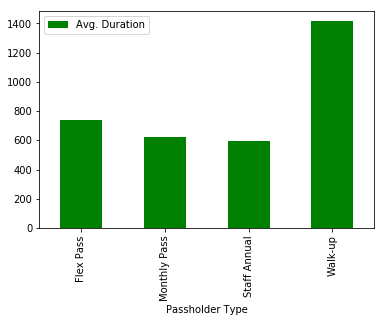

In [29]:
#aggregation table by passholder type and average duration
passdur = df.groupby('Passholder Type')['Duration'].mean().reset_index(name ='Avg. Duration')
print (passdur)

passdur.plot(kind='bar', x='Passholder Type',stacked=False, color=['green','red'])

### From the views above, monthly passes contribute to 62% of the trips taken, and are also the least in average duration (779 seconds), so we may potentially have more availability out of bikes being ridden by monthly pass holders. Walk-ups (31% of rides) tend to spend the most amount of time, on average, on the bikes.

In [30]:
#simple statistics for our two groups
df_stats = df.groupby(['Council Districts', 'Passholder Type']).agg(['count','mean', 'median', 'std']) 
df_stats.columns = ["_".join(x) for x in df_stats.columns.ravel()]

df_stats.iloc[:,4:8].reset_index() #choosing to show the Duration statistics, from columns 4:8, since it's most relevant

,Council Districts,Passholder Type,Duration_count,Duration_mean,Duration_median,Duration_std
0,9.0,Flex Pass,6645,743.792325,600,652.967066
1,9.0,Monthly Pass,55322,618.236868,480,511.023445
2,9.0,Staff Annual,264,603.636364,420,762.105621
3,9.0,Walk-up,26085,1378.155262,1020,1083.756269
4,11.0,Flex Pass,389,953.830334,780,701.329358
5,11.0,Monthly Pass,3484,744.523536,660,549.096486
6,11.0,Staff Annual,32,472.500000,300,483.315165
7,11.0,Walk-up,1819,1722.814733,1320,1266.659890
8,13.0,Flex Pass,53,1231.698113,840,1059.458744
9,13.0,Monthly Pass,756,1038.174603,840,913.338597


### In the table above, we have grouped council districts and passholder types to get some simple statistics on trip duration (count, mean, median, std.)

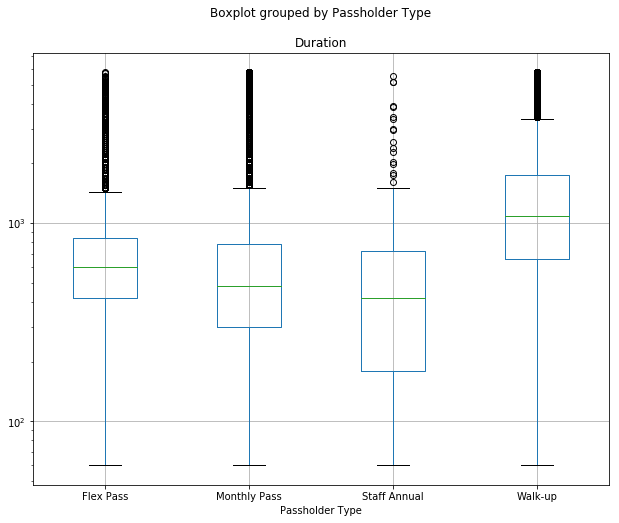

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column='Duration', by='Passholder Type',ax=ax)
ax.set_yscale('log')

### The boxplot above shows the distribution (logged) of passholder type and duration. Upon first glance, it appears we have equal variance across groups, although to see differences in median duration, we would need to conduct appropriate tests (ANOVA or Kruskal-Wallis) depending on assumptions of our groups.

### In the sections that follow, we'll be using our datetime fields to gain insights into the time-related trends in our eight-month period of bike data. We will first be be splitting up our string fields, converting to datetime, and then grouping some variables by day and month.

In [32]:
#Let's split our date columns, creating separate columns for date and time respectively
new = df["Start Time"].str.split("T", n = 2, expand = True)
df["Start Day"]= new[0]
df["Start Time"]= new[1]

new2 = df["End Time"].str.split("T", n = 2, expand = True)
df["End Day"]= new2[0] 
df["End Time"]= new2[1]


In [33]:
#lets print out the column list to see our new time values
cols = list(df.columns.values)
cols

['Trip ID',
 'Duration',
 'Start Time',
 'End Time',
 'Starting Station ID',
 'Starting Station Latitude',
 'Starting Station Longitude',
 'Ending Station ID',
 'Ending Station Latitude',
 'Ending Station Longitude',
 'Bike ID',
 'Plan Duration',
 'Trip Route Category',
 'Passholder Type',
 'Starting Lat-Long',
 'Ending Lat-Long',
 'Neighborhood Councils (Certified)',
 'Council Districts',
 'Zip Codes',
 'LA Specific Plans',
 'Precinct Boundaries',
 'Census Tracts',
 'Start Day',
 'End Day']

In [34]:
#Let's rearrange our columns so dates and times are adjacent to one another in the dataset
df = df[['Trip ID','Duration','Start Day','Start Time','End Day','End Time','Starting Station ID',
 'Starting Station Latitude',
 'Starting Station Longitude',
 'Ending Station ID',
 'Ending Station Latitude',
 'Ending Station Longitude',
 'Bike ID',
 'Plan Duration',
 'Trip Route Category',
 'Passholder Type',
 'Starting Lat-Long',
 'Ending Lat-Long',
 'Neighborhood Councils (Certified)',
 'Council Districts',
 'Zip Codes',
 'LA Specific Plans',
 'Precinct Boundaries',
 'Census Tracts']]

#Now we'll confirm our columns are in the right order
cols = list(df.columns.values)
cols

['Trip ID',
 'Duration',
 'Start Day',
 'Start Time',
 'End Day',
 'End Time',
 'Starting Station ID',
 'Starting Station Latitude',
 'Starting Station Longitude',
 'Ending Station ID',
 'Ending Station Latitude',
 'Ending Station Longitude',
 'Bike ID',
 'Plan Duration',
 'Trip Route Category',
 'Passholder Type',
 'Starting Lat-Long',
 'Ending Lat-Long',
 'Neighborhood Councils (Certified)',
 'Council Districts',
 'Zip Codes',
 'LA Specific Plans',
 'Precinct Boundaries',
 'Census Tracts']

In [35]:
#Convert date fields from string to datetime format for follow-on time analysis
df['Start Day'] = pd.to_datetime(df['Start Day'])
df['End Day'] = pd.to_datetime(df['End Day'])

print(df.dtypes)

Trip ID                                       int64
Duration                                      int64
Start Day                            datetime64[ns]
Start Time                                   object
End Day                              datetime64[ns]
End Time                                     object
Starting Station ID                         float64
Starting Station Latitude                   float64
Starting Station Longitude                  float64
Ending Station ID                           float64
Ending Station Latitude                     float64
Ending Station Longitude                    float64
Bike ID                                     float64
Plan Duration                               float64
Trip Route Category                          object
Passholder Type                              object
Starting Lat-Long                            object
Ending Lat-Long                              object
Neighborhood Councils (Certified)           float64
Council Dist

### When we were discussing the last section about additional features we might be able to draw from our data, we decided to go ahead and create some of these. We will list them here, so that we can use them in subsequent sections. We will also briefly mention them in the Exceptional Work Section. The first additional feature we analyzed was to check and see if there were any trends in quantity of rides based off of days of the week.

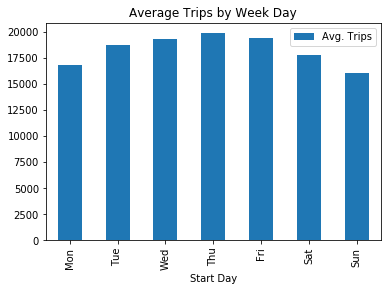

In [36]:
#Creating variable for average number of bike trips per week day
AvgTripsDOW = df.groupby([df['Start Day'].dt.strftime('%a')])['Trip ID'].count().reset_index(name ='Avg. Trips')

# Use a trick to order days names in the table created by previous groupby
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
mapping = {day: i for i, day in enumerate(weekdays)}
key = AvgTripsDOW['Start Day'].map(mapping)    
AvgTripsDOW = AvgTripsDOW.iloc[key.argsort()]
AvgTripsDOW.plot(kind='bar', x='Start Day',title ="Average Trips by Week Day") # Bar Chart creation
ax.set_ylabel("Average Trips", fontsize=12)
plt.show()

### We discovered that the average amount of trips above show almost a bell curve distribution, with peaks in ridership around mid-week.

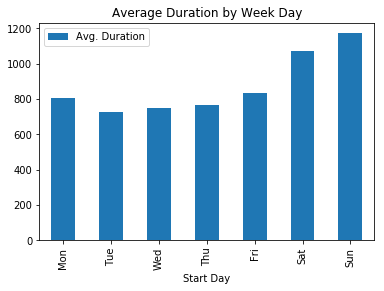

In [37]:
#Creating variable for average duration of bike trips per week day
Avg_Dur_Day = df.groupby([df['Start Day'].dt.strftime('%a')])['Duration'].mean().reset_index(name ='Avg. Duration')
Avg_Dur_Day = Avg_Dur_Day.iloc[key.argsort()]
Avg_Dur_Day.plot(kind='bar', x='Start Day',title ="Average Duration by Week Day") # Bar Chart creation
ax.set_ylabel("Average Duration", fontsize=12)
plt.show()

### The next variable we added was to look at the average duration of a trip per day. Clearly, the weekends get the longest bike rides as far as duration, with Sunday showing the highest average duration. This possibly speaks to the types of riders on these days. Work travelers may take more frequent rides during the work week, and more leisure-like riders may be taking longer rides on weekends.

### After seeing that there were some differences between days of the week, we decided to look at the number of trip and average trip durations month-over-month.

Text(0.5,0,'Year, Month')

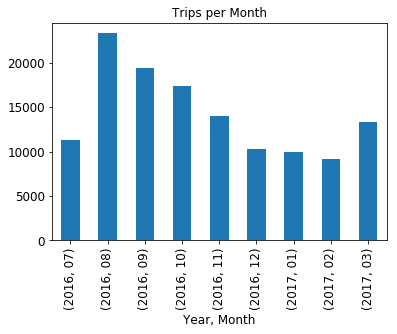

In [38]:
#Sorting the values first
df = df.sort_values(by='Trip ID')
#Created the trip count metric
Trips_Month = df.groupby([df['Start Day'].dt.strftime('%Y'),df['Start Day'].dt.strftime('%m')])['Trip ID'].count()

#Bar chart creation
axm = Trips_Month.plot(kind='bar', title ="Trips per Month", legend=False, fontsize=12)
axm.set_xlabel("Year, Month", fontsize=12)

### It's interesting to see the ridership trends over the eight months, especially as ridership increases in August of 2016 shortly after launch, and how the number of trips have waned after launch. As far as average duration, It appears we have stabilized at around 1200-1300 seconds per ride (20 minutes). We still need much more data to study any seasonal factors related to the data.

### Finally, we created a common metric used in the bike-share industry to gauge ridership levels. The code below creates the metric: number of rides per bike per day.

Start Day  Start Day
2016       07           0.646483
           08           0.992203
           09           0.862354
           10           0.804375
           11           0.686254
           12           0.494817
2017       01           0.454591
           02           0.473951
           03           0.583717
dtype: float64

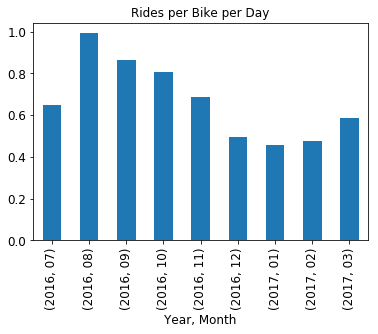

In [39]:
#The following sequence of steps below create the "# rides per bike/day" metric
NumTrips = df.groupby([df['Start Day'].dt.strftime('%Y'),df['Start Day'].dt.strftime('%m')])['Trip ID'].nunique() #first we find a count of trips per month
MonthDays = df.groupby([df['Start Day'].dt.strftime('%Y'),df['Start Day'].dt.strftime('%m')])['Start Day'].nunique() #next we find the number of days in each month
BikeCount = df.groupby([df['Start Day'].dt.strftime('%Y'),df['Start Day'].dt.strftime('%m')])['Bike ID'].nunique() #next we'll get a unique count of bikes per month
TripsMonth = NumTrips / BikeCount #we'll divide trip counts on our month level by the count of bikes each month
AvgTripsBikeDay = TripsMonth / MonthDays #Finally, we'll divide  our "trips ber bike" calculation by number of days in the month

#Results Bar chart creation
ax = AvgTripsBikeDay.plot(kind='bar', title ="Rides per Bike per Day", legend=False, fontsize=12)
ax.set_xlabel("Year, Month", fontsize=12)
AvgTripsBikeDay

### You can see the spike in August of 2016, each bike averaged at least one ride per day this month, possibly due to buzz around the bikes coming to LA. It tapers off in the fall and winter months, although since we are missing a full year's worth of data, it is difficult to pinpoint the peaks and valleys as overall waning of interest, or if there is in fact a seasonal factor at play. An interesting observation is that it coincides with average duration per month in the previous section.

# 5) Visualize Most Interesting Attributes

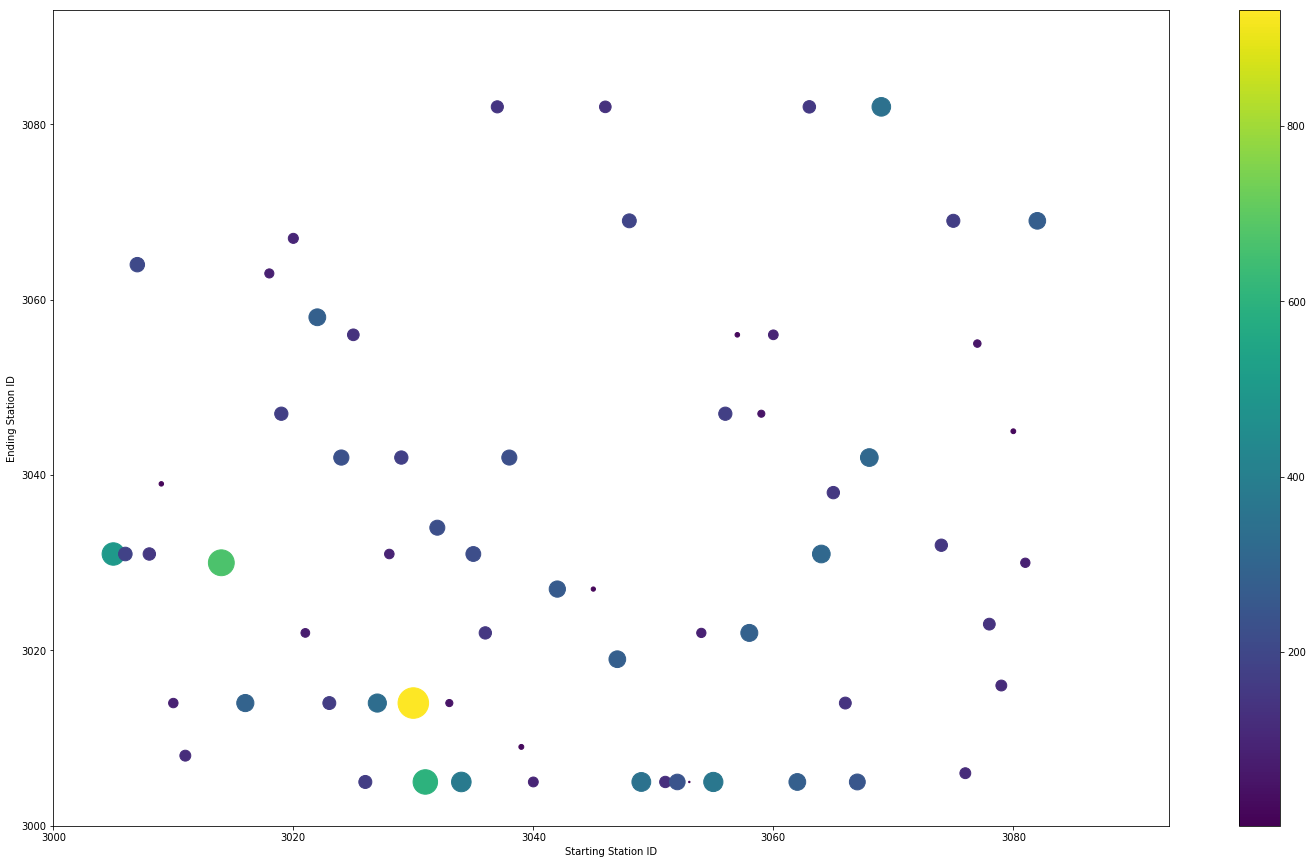

In [40]:
#Although not as immediately insightful, we are able to see the density of trips between specific stations with this simple heat map. 


ndf=df[['Starting Station ID','Ending Station ID','Trip ID']]
mask=df['Trip Route Category']=='One Way'
kndf=ndf[mask].groupby(['Starting Station ID','Ending Station ID']).agg('count')
kndf=kndf.reset_index()
klistofindex=[kndf[kndf['Starting Station ID']==x]['Trip ID'].idxmax() for x in kndf['Starting Station ID'].unique()]
kndf=kndf.loc[klistofindex]   
plt.figure(figsize=(25,15))
plt.scatter(x=kndf['Starting Station ID'],y=kndf['Ending Station ID'],c=kndf['Trip ID'],s=kndf['Trip ID'])
plt.axis([3000.0,3093.0,3000.0,3093.0])
plt.xlabel('Starting Station ID')
plt.ylabel('Ending Station ID')
plt.colorbar()
plt.show()

# 6) Explore Joint Attributes

Taking a deep dive into how 'Plan Duration' and 'Passholder Type' may play a role across the data attributes.

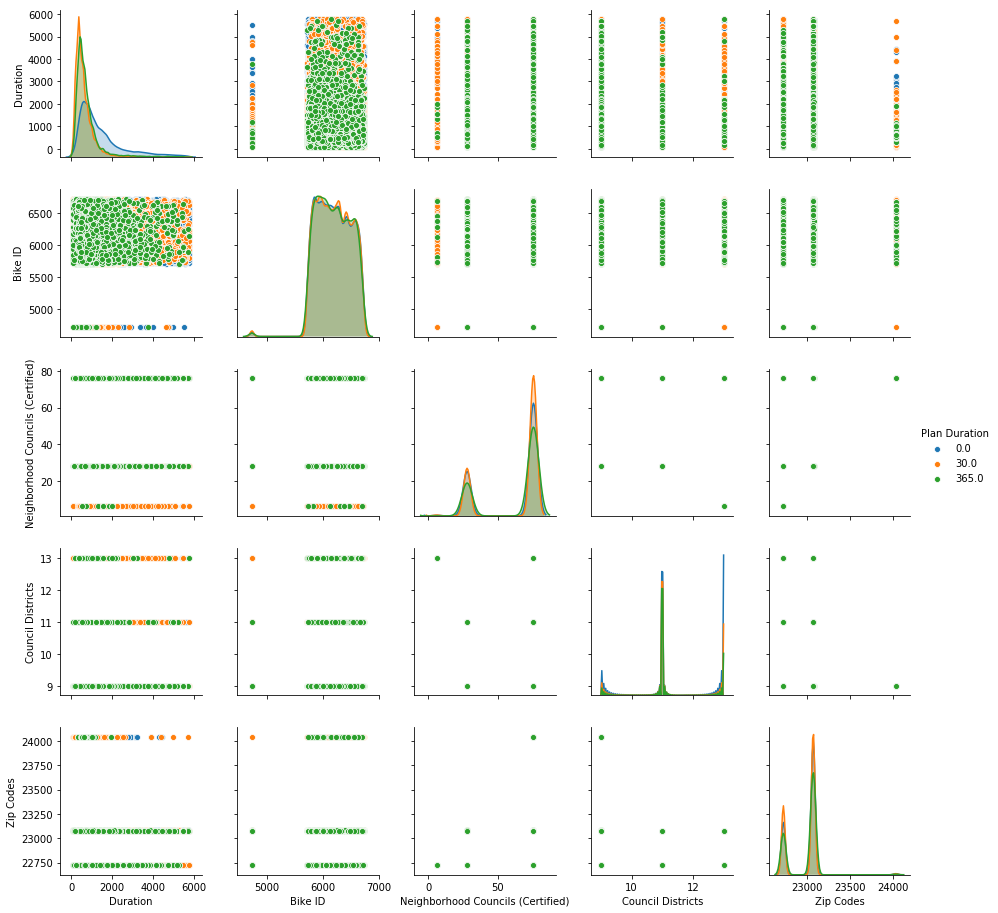

In [41]:
import seaborn as sns

cont_cols = ['Duration', 'Bike ID', 'Neighborhood Councils (Certified)', 'Council Districts', 'Zip Codes', 'Plan Duration', 'Passholder Type']

sns.pairplot(df[cont_cols], hue = "Plan Duration")

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/seaborn/distributions.py:290: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/seaborn/distributions.py:290: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/seaborn/distributions.py:290: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


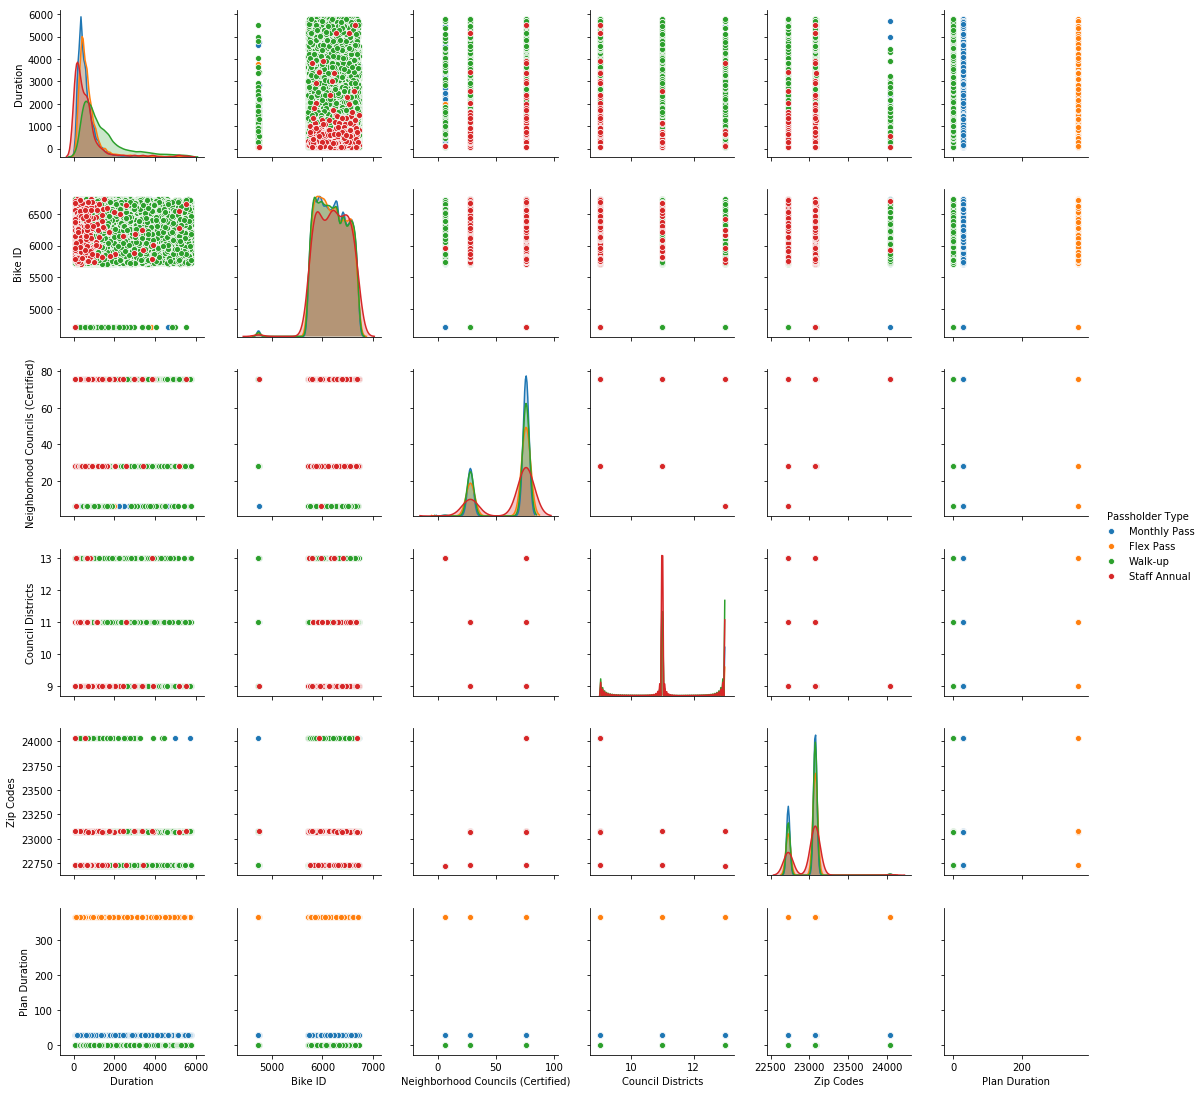

In [42]:
sns.pairplot(df[cont_cols], hue = "Passholder Type")

# 8) New Features

Our data set, pulled from Kaggle.com, only includes nine months of data. If we were to access more quarters of data from LA Metro’s website, we could have a full year or even multiple years to better see trends in the bikes’ usage patterns. We have created some of these additional variables already; however, having more complete time series data would also allow us to approach and answer several more problems. For instance, if not a lot of people are using the bicycles in the winter months, that might be a good time to pull them from usage for servicing. Or perhaps if the bikes have a certain life cycle before needing to be retired. Then we could identify the months the bikes are most in demand, and we could plan the purchasing of new bikes to occur immediately before this time. This way storage is not a concern, or an expense, and the new bicycles could be put appropriately into use before consumer demands increase.

Another important feature would be to track where the bicycles are located at different times and on different days. It is important to know where demand is occurring and to make sure the bikes are located conveniently when people need them. Having these data trends would greatly help LA Metro’s employees relocate bikes back to places where they will be utilized. The moving company, U-Haul, sets there pricing structure based on where there is demand for their moving trucks. If a customer is moving to a high-need city, then they will pay significantly less than a person moving to a low-need area. It is possible LA Metro could later introduce a similar incentivized pricing structure. This way their employees would not need to replace the bicycles because paying customers would be motivated to ride them to high need areas due to a lower price point.

An additional feature that we could add to our data set, would be to include data from LA Metro Transportation’s other transit options such as buses and trains. Having all this data in one place would help to see big picture of how people are using public transit options in tandem and how LA metro can best accommodate these needs.

The last feature we thought we might add would be distance traveled "as the crow flies". We could calculate this using the starting and ending latitude-longitude variables. While this mileage may not be the entire amount of miles ridden on the LA Metro bikes, it would make for interesting information on how far the public is traveling using these bicycles. Additional information that might be calculated from miles cycled would be calories burned by the riders or pollution prevented by not using automobiles to cover that mileage - both of these statistics would be great for creating support for the LA Metro bike share program.

# 9) Exceptional Work

### One piece we believe to be exceptional work is that instead of just listing possible new features as required in the eighth section, we decided to go ahead create these features to gain further insight into our dataset. The additional features we added were: rides taken per day, average length of rides by day, rides taken per month, average length of each individual trip per month, the number of times each bike was ridden in a day, and distance as the crow flies per trip.

In [43]:
#Rides taken per day
df['Rides Per Day']=df.groupby('Start Day')['Trip ID'].transform('count')
df['Rides Per Day'].unique()

array([ 181,  340,  413,  323,  531,  535,  560,  470,  401,  350,  432,
        496,  484,  530,  464,  336,  541,  520,  478,  345,  609,  500,
        536,  623,  750,  753,  843,  832,  836,  749,  696,  733,  804,
        927,  794,  622,  570,  662,  809,  752,  703,  713,  610,  576,
        692,  833,  813,  743,  854,  722,  762,  761,  723,  712,  731,
        631,  801,  661,  654,  690,  739,  613,  547,  628,  679,  694,
        738,  760,  592,  577,  614,  594,  709,  561,  507,  502,  566,
        579,  634,  606,  617,  663,  643,  523,  522,  537,  513,  571,
        647,  574,  440, 1194,  391,  550,  573,  469,  421,  467,  538,
        562,  533,  314,  506,  539,  587,  486,  490,  503,  546,  528,
        595,  526,  616,  410,  564,  455,  485,  194,  436,  480,  429,
        240,  308,  222,  288,  351,  430,  452,  419,  368,  342,  358,
        424,  433,  438,  388,  270,  376,  381,  435,  277,  291,  315,
        239,  374,  373,  275,  300,  234,  162,  1

In [44]:
#Average length of ride per day
df['ALORBD'] = df.groupby('Start Day')['Duration'].transform(np.mean)
df['ALORBD'].unique()

array([ 910.60773481,  894.70588235,  995.15738499,  899.81424149,
        769.23529412,  693.33333333,  712.93457944,  733.07142857,
        779.36170213,  865.43640898,  879.6       ,  789.86111111,
        781.69354839,  632.3553719 ,  683.66037736,  668.92241379,
        723.57142857,  689.50092421,  692.76923077,  630.37656904,
        646.30188679,  819.30434783,  676.55172414, 1080.96      ,
       1052.01492537,  864.84751204,  812.32      ,  883.8247012 ,
        776.15658363,  980.33653846, 1196.26794258, 1171.32176235,
        855.60344828,  873.72442019,  860.44776119,  895.53398058,
        946.24685139, 1321.44694534, 1262.42105263, 1234.35045317,
        943.09023486,  815.82446809,  817.46799431,  756.69004208,
        842.26229508, 1198.02083333, 1165.66473988,  915.70228091,
        829.96309963,  807.05248991,  833.46604215,  920.27700831,
       1186.61354582, 1205.90551181,  862.31274639,  811.12033195,
        895.53370787,  917.56497948,  970.55467512, 1650.14051

In [45]:
#Rides taken per month
df['Rides Per Month']=df.groupby([df['Start Day'].dt.strftime('%m')])['Trip ID'].transform('count')
df['Rides Per Month'].unique()

array([11245, 23327, 19356, 17430, 13979, 10262,  9921,  9170, 13300])

In [46]:
#Average lenth of rides per month.
df['ALORBM']=df.groupby([df['Start Day'].dt.strftime('%m')])['Duration'].transform(np.mean)
df['ALORBM']

123343    777.278791
101945    777.278791
90791     777.278791
78401     777.278791
113869    777.278791
96305     777.278791
97409     777.278791
110944    777.278791
81349     777.278791
106250    777.278791
91514     777.278791
86799     777.278791
79043     777.278791
88741     777.278791
102472    777.278791
87180     777.278791
96150     777.278791
113607    777.278791
91295     777.278791
125256    777.278791
126402    777.278791
89506     777.278791
110827    777.278791
111453    777.278791
113748    777.278791
109737    777.278791
101281    777.278791
102479    777.278791
110831    777.278791
90355     777.278791
             ...    
50886     840.406015
32790     840.406015
9622      840.406015
9247      840.406015
34256     840.406015
77025     840.406015
16504     840.406015
24957     840.406015
59259     840.406015
10923     840.406015
26873     840.406015
1665      840.406015
30786     840.406015
45658     840.406015
54812     840.406015
38131     840.406015
39982     840

In [47]:
#Number of times each bike was ridden per day
df['Rides Per Day Per Bike']=df.groupby(['Start Day', 'Bike ID'])['Trip ID'].transform('count')
df['Rides Per Day Per Bike']

123343    2
101945    2
90791     2
78401     4
113869    3
96305     3
97409     2
110944    3
81349     1
106250    2
91514     1
86799     3
79043     4
88741     5
102472    2
87180     3
96150     1
113607    1
91295     3
125256    1
126402    5
89506     2
110827    2
111453    2
113748    2
109737    1
101281    2
102479    4
110831    1
90355     1
         ..
50886     2
32790     3
9622      3
9247      2
34256     2
77025     1
16504     1
24957     2
59259     1
10923     2
26873     4
1665      2
30786     1
45658     1
54812     1
38131     2
39982     1
44461     1
37706     1
12673     6
28606     3
14501     3
56605     3
21856     1
36161     3
65083     3
72595     1
691       1
59932     1
60961     3
Name: Rides Per Day Per Bike, Length: 127990, dtype: int64

In [48]:
#Distance per trip - Using the math package we are able to calculate distance as the crow flies 
#by using lat-long from starting location and finishing location
l = []
degrees_to_radians = math.pi/180.0
def distance_on_unit_sphere(lat1, long1, lat2, long2):
    phi1 = (90.0 - lat1)*degrees_to_radians
    phi2 = (90.0 - lat2)*degrees_to_radians
    
    theta1 = long1*degrees_to_radians
    theta2 = long2*degrees_to_radians
    
    a = ((math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2)) +(math.cos(phi1)*math.cos(phi2)))
    if a>1:
        a=0.999999
    dis = math.acos( a )
    return dis*6373
for i in range(97825):
    l.append(distance_on_unit_sphere(df['Starting Station Latitude'].iloc[i],
                                     df['Starting Station Longitude'].iloc[i],
                                     df['Ending Station Latitude'].iloc[i],
                                     df['Ending Station Longitude'].iloc[i]))

In [49]:
#Setting distance as data frame and quickly describing it reveals that there are probably some bad data resulting from incorrect lat-long points. 

dist = pd.DataFrame({'Distance':l})
dist.describe()

,Distance
count,97825.000000
mean,5.843778
std,244.573360
min,0.000000
25%,0.583553
50%,0.969225
75%,1.465865
max,12580.798182


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131148950>]],
      dtype=object)

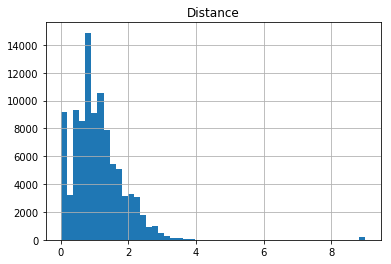

In [50]:
#By quickly limiting it toantyhing less than 10 miles we quickly solve the problem and are able to show a clean histogram. 

clean_dist = dist[~(dist['Distance'] > 10)] 
clean_dist.hist(column='Distance', bins = 50)

In [51]:
df

,Trip ID,Duration,Start Day,Start Time,End Day,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,...,Council Districts,Zip Codes,LA Specific Plans,Precinct Boundaries,Census Tracts,Rides Per Day,ALORBD,Rides Per Month,ALORBM,Rides Per Day Per Bike
123343,1912818,180,2016-07-07,04:17:00.000,2016-07-07,04:20:00.000,3014.0,34.056610,-118.237210,3014.0,...,9.0,22728.0,27.0,1322.0,532.0,181,910.607735,11245,777.278791,2
101945,1919661,1980,2016-07-07,06:00:00.000,2016-07-07,06:33:00.000,3014.0,34.056610,-118.237210,3014.0,...,9.0,22728.0,27.0,1322.0,532.0,181,910.607735,11245,777.278791,2
90791,1933383,300,2016-07-07,10:32:00.000,2016-07-07,10:37:00.000,3016.0,34.052898,-118.241560,3016.0,...,9.0,22728.0,NaN,1502.0,543.0,181,910.607735,11245,777.278791,2
78401,1940317,420,2016-07-07,12:51:00.000,2016-07-07,12:58:00.000,3032.0,34.049889,-118.255880,3032.0,...,9.0,23078.0,NaN,733.0,546.0,181,910.607735,11245,777.278791,4
113869,1943980,540,2016-07-07,13:50:00.000,2016-07-07,13:59:00.000,3033.0,34.040989,-118.255800,3030.0,...,9.0,24038.0,NaN,1502.0,543.0,181,910.607735,11245,777.278791,3
96305,1943981,420,2016-07-07,13:49:00.000,2016-07-07,13:56:00.000,3030.0,34.051941,-118.243530,3030.0,...,9.0,22728.0,NaN,1502.0,543.0,181,910.607735,11245,777.278791,3
97409,1943982,840,2016-07-07,13:42:00.000,2016-07-07,13:56:00.000,3033.0,34.040989,-118.255800,3036.0,...,9.0,24038.0,NaN,1287.0,533.0,181,910.607735,11245,777.278791,2
110944,1943988,240,2016-07-07,13:41:00.000,2016-07-07,13:45:00.000,3014.0,34.056610,-118.237210,3014.0,...,9.0,22728.0,27.0,1322.0,532.0,181,910.607735,11245,777.278791,3
81349,1944025,540,2016-07-07,13:32:00.000,2016-07-07,13:41:00.000,3066.0,34.063389,-118.236160,3016.0,...,11.0,22728.0,NaN,1502.0,543.0,181,910.607735,11245,777.278791,1
106250,1944030,120,2016-07-07,13:22:00.000,2016-07-07,13:24:00.000,3014.0,34.056610,-118.237210,3014.0,...,9.0,22728.0,27.0,1322.0,532.0,181,910.607735,11245,777.278791,2
